这是一个词向量模型代码展示
*导入数据
*构建模型
*训练模型
*可视化
*保存模型
*加载模型
*计算相似度

# 数据准备

In [1]:
import random
import numpy as np
random.seed(42)
np.random.seed(42)

In [2]:
## 导入数据
import pandas as pd

In [3]:
df = pd.read_excel(r'D:\text analysis\weibo_pure.xlsx')
df

,内容
0,天呐！我被渣了？！恋爱无数次 竟然又遇渣男为了你们不被骗海后黎女士教你们三步识渣男！快快收藏...
1,难怪恐婚的越来越多，结婚的越来越少！看了这结婚协议，真是惊呆了！⭕️年轻人对待爱情都这么冷漠...
2,奋不顾身的投入一段感情但却被伤透了心或许这就是年轻人恐婚的源头吧！视频来源｜乔七月L蟹老板爱...
3,爸爸：“你不结婚，他不结婚，那人类不灭绝了吗？”00后女儿：“那恐龙也生孩子，不也灭绝了吗。...
4,我大概是一个很自私的人，我觉得结婚和生小孩会耽误我爱自己，也有可能是觉得自身能力支撑不住对自...
...,...
1041,南京的小可爱们，你觉得有哪些呢？2南京​
1042,在一回首间，才忽然发现，原来，我一生的种种努力，不过只为了要使周遭的人都对我满意而已。为了要...
1043,单身万岁！无拘无束！想干啥干啥！不用担心别人的想法！ ​
1044,胆小（既然是年轻人就应该多尝试） ​


# 分词

In [4]:
import jieba #中文分词
import string
import re

In [5]:
# 停用词设置
custom_stopwords = ['没有','年轻人','一个','的', '了', '和', '是', '就', '都', '而', '及', '与', '这', '那', '在', '有', 
    '我', '你', '他', '她', '它', '我们', '他们', '其实', '很多', '不会', '不能', 
    '知道', '看到', '需要', '感觉', '如果', '那个', '已经', '还有', '怎么', '遇到',
    '应该', '想要', '认为', '或者', '甚至', '一直', '不要', '所有', '永远', '不敢',
    '只是', '只有', '虽然', '面对', '特别', '一种', '可是', '各种', '还要', '以为', 
    '好像', '成为', '真正', '这些', '不过', '带来', '必须', '无论', '每个', '足够', 
    '出现', '反而', '变成', '多少', '容易', '愿意', '一切', '不了', '不够', '东西', 
    '于是', '怎样', '一些', '不到', '不愿', '原来', '只会', '告诉', '导致', '放弃', 
    '确定', '结束', '结果', '而且', '讨论', '那种', '麻烦', '一点', '不仅', '之间', 
    '大家', '如何', '总是', '我会', '曾经', '状态', '程度', '经历', '解决', '除了', 
    '问题', '事情', '两个', '对方', '今天', '每天', '突然', '一样', 
    '不如', '有人', '发现', '超话', '而已', '那些', '重要', '想法', '技巧', '准备', 
    '微博', '觉得', '原因', '真的', '为什么', '因为', '什么', '就是', '不是', '但是',
    '真的', '可能', '这个', '那么', '现在', '可以', '不想', '害怕','还是', '所以', 
    '这样', '当代', '为了', '老公', '最后', '主要', '然后', '究竟','产生', 
    '一定', '这么', '这种', '大概', '身边', '一起', '喜欢', '时候', '##']


# 处理中文、英文、数字标点
from string import punctuation
chinese_punct = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～￥、。《》【】（）“”‘’…'
all_stopwords = set(custom_stopwords + list(punctuation) + list(chinese_punct))

In [6]:
## 定义文本清洗函数
def clean_text(text):
    # 分词
    words = jieba.lcut(text)
    # 去除停用词、单字符、英文字母、数字、乱码等
    words = [w for w in words 
             if w not in all_stopwords 
             and len(w.strip()) > 1 
             and not re.match(r'^[a-zA-Z0-9]+$', w)  # 排除英文字母或数字
             and not re.match(r'^\s*$', w)]         # 排除空白字符
    return ' '.join(words)   #将分词结果用空格连接成字符串

In [7]:
test = df['内容'][0]
clean_text(test)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\SHANGS~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.753 seconds.
Prefix dict has been built successfully.


'天呐 恋爱 无数次 竟然 遇渣 你们 骗海 后黎 女士 你们 三步 识渣 快快 收藏 全是 干货 恋爱 黎拉 品味 视频 抽奖 详情'

In [8]:
df['内容分词'] = df['内容'].apply(clean_text)
df

,内容,内容分词
0,天呐！我被渣了？！恋爱无数次 竟然又遇渣男为了你们不被骗海后黎女士教你们三步识渣男！快快收藏...,天呐 恋爱 无数次 竟然 遇渣 你们 骗海 后黎 女士 你们 三步 识渣 快快 收藏 全是 ...
1,难怪恐婚的越来越多，结婚的越来越少！看了这结婚协议，真是惊呆了！⭕️年轻人对待爱情都这么冷漠...,难怪 恐婚 越来越 结婚 越来越少 结婚 协议 真是 惊呆 对待 爱情 冷漠 数字化 结婚 ...
2,奋不顾身的投入一段感情但却被伤透了心或许这就是年轻人恐婚的源头吧！视频来源｜乔七月L蟹老板爱...,奋不顾身 投入 一段 感情 透了心 或许 恐婚 源头 视频 来源 七月 老板 爱卖萌 视频
3,爸爸：“你不结婚，他不结婚，那人类不灭绝了吗？”00后女儿：“那恐龙也生孩子，不也灭绝了吗。...,爸爸 结婚 结婚 人类 灭绝 女儿 恐龙 孩子 灭绝 爸爸 情感
4,我大概是一个很自私的人，我觉得结婚和生小孩会耽误我爱自己，也有可能是觉得自身能力支撑不住对自...,自私 结婚 生小孩 耽误 自己 自身 能力 支撑 不住 自己 小孩 期待
...,...,...
1041,南京的小可爱们，你觉得有哪些呢？2南京​,南京 小可爱 哪些 南京
1042,在一回首间，才忽然发现，原来，我一生的种种努力，不过只为了要使周遭的人都对我满意而已。为了要...,回首 忽然 一生 种种 努力 周遭 满意 博得 他人 称许 微笑 战战兢兢 自己 套入 模式...
1043,单身万岁！无拘无束！想干啥干啥！不用担心别人的想法！ ​,单身 万岁 无拘无束 不用 担心 别人
1044,胆小（既然是年轻人就应该多尝试） ​,胆小 既然 尝试


# 语料库准备

In [9]:
from gensim.test.utils import common_texts 
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [10]:
corpus = df['内容分词'].apply(lambda x: x.split()).tolist() #切分词语 corpus是一个二维列表
for document in corpus[:5]:
    print(document)

['天呐', '恋爱', '无数次', '竟然', '遇渣', '你们', '骗海', '后黎', '女士', '你们', '三步', '识渣', '快快', '收藏', '全是', '干货', '恋爱', '黎拉', '品味', '视频', '抽奖', '详情']
['难怪', '恐婚', '越来越', '结婚', '越来越少', '结婚', '协议', '真是', '惊呆', '对待', '爱情', '冷漠', '数字化', '结婚', '协议', '结婚', '说好', '感情', '男女平等', '婚前', '协议', '恐婚', '婚姻', '感情', '婚姻', '爱情', '本质']
['奋不顾身', '投入', '一段', '感情', '透了心', '或许', '恐婚', '源头', '视频', '来源', '七月', '老板', '爱卖萌', '视频']
['爸爸', '结婚', '结婚', '人类', '灭绝', '女儿', '恐龙', '孩子', '灭绝', '爸爸', '情感']
['自私', '结婚', '生小孩', '耽误', '自己', '自身', '能力', '支撑', '不住', '自己', '小孩', '期待']


# 自己训练词嵌入模型

In [11]:
from gensim.models import Word2Vec #训练 Word2Vec 模型

# 训练词嵌入模型
model = Word2Vec(
    corpus, #训练语料
    window = 5, #训练算法考虑的当前词语与预测词语在一个句子中的最大距离（窗口大小）
    vector_size = 300, #自定义训练向量维度
    min_count = 1, #忽略所有总频数低于这个值的词语
    seed=42,  #固定随机种子，确保结果可复现
    workers=1  #禁止多线程并行训练，进一步确保每次训练结果一致
)

# 保存训练好的模型
model.save('Word2vec_ad.model')

# 查看词向量

In [12]:
word_list = model.wv.index_to_key #获取词汇表
word_vectors = model.wv[word_list] #获取词向量

# 打印前5个词及其向量表示
for word, vector in list(zip(word_list, word_vectors))[:5]:
    print(f'{word}:{vector}')

结婚:[-2.10118922e-03 -1.87757221e-04 -1.50754058e-03 -1.92730862e-03
 -1.14254700e-03  3.94223072e-03  1.26616331e-03  2.77405046e-03
 -5.62127354e-03  1.20697217e-03  6.09404175e-03  6.41593849e-03
  4.31522680e-03  6.87400298e-03  1.71239779e-03 -3.09289433e-03
  5.09236008e-03 -8.15571565e-03 -4.04786179e-03 -4.84198378e-03
  8.61523394e-03  4.26708255e-03 -6.61407970e-03  1.23258596e-02
  4.56175068e-03  2.58775312e-03 -1.30517576e-02  6.29768881e-04
  2.49075959e-03  2.14664824e-03 -7.96085875e-03 -3.86095326e-03
 -4.84711956e-03  3.26191750e-03  5.57000516e-03 -2.07071309e-03
  8.95950187e-04 -7.83691090e-03 -2.81297439e-03  4.88849590e-03
  3.58343800e-03  3.77464667e-03  4.99018840e-03  6.75385294e-04
  2.53569474e-03  4.97517735e-03  1.01096528e-02  9.14440583e-03
  2.63934839e-03  6.55559963e-03 -7.46026030e-03 -1.02893393e-02
 -3.85010941e-03 -1.27743010e-03  7.74299959e-03 -5.54558868e-03
  2.47809454e-03  1.55175745e-03  7.08263880e-03  1.04266393e-03
  1.48061733e-03  4.24

In [13]:
print(word_list[:20])

['结婚', '恐婚', '自己', '婚姻', '孩子', '生活', '视频', '家庭', '离婚', '单身', '爱情', '父母', '越来越', '恐惧', '我怕', '婚后', '男人', '幸福', '开始', '女性']


# 计算词语相似度

In [14]:
## 使用余弦相似度 wv 度量词对之间的语义接近度
## 余弦相似度的取值介于[-1，1]之间，-1表示语义完全相反，1表示语义完全相同，0表示毫无关系
print(model.wv.similarity('恐婚','家暴'))
print(model.wv.similarity('恐婚','孩子'))
print(model.wv.similarity('恐婚','父母'))
print(model.wv.similarity('恐婚','爸爸'))
print(model.wv.similarity('恐婚','视频'))
print(model.wv.similarity('恐婚','希望'))
print(model.wv.similarity('恐婚','幸福'))
print(model.wv.similarity('恐婚','生活'))
print(model.wv.similarity('恐婚','工作'))
print(model.wv.similarity('恐婚','婆婆'))
print(model.wv.similarity('恐婚','男人'))
print(model.wv.similarity('恐婚','照顾'))
print(model.wv.similarity('恐婚','出轨'))

0.5925073
0.72599435
0.7022533
0.34804487
0.58252984
0.5574865
0.6605137
0.7373615
0.6334727
0.4549693
0.7194416
0.5530827
0.6873007


In [15]:
model.wv.most_similar('婚姻') #返回与“婚姻”最相似的词列表（包括相似度分数）

[('结婚', 0.8524055480957031),
 ('自己', 0.8388712406158447),
 ('孩子', 0.8127341866493225),
 ('家庭', 0.7935939431190491),
 ('生活', 0.7916733622550964),
 ('恐婚', 0.7627230286598206),
 ('男人', 0.7446576952934265),
 ('父母', 0.7404768466949463),
 ('女性', 0.7384829521179199),
 ('幸福', 0.7384048104286194)]

In [16]:
model.wv.most_similar('恐婚') #返回与“恐婚”最相似的词列表（包括相似度分数）

[('结婚', 0.7941848039627075),
 ('自己', 0.7646103501319885),
 ('婚姻', 0.7627230286598206),
 ('生活', 0.7373615503311157),
 ('感情', 0.7309913635253906),
 ('孩子', 0.725994348526001),
 ('男人', 0.7194415330886841),
 ('父母', 0.7022532820701599),
 ('离婚', 0.6990829110145569),
 ('家庭', 0.6975990533828735)]

In [17]:
model.wv.most_similar('结婚') #返回与“结婚”最相似的词列表（包括相似度分数）

[('自己', 0.8677165508270264),
 ('婚姻', 0.8524055480957031),
 ('生活', 0.8232546448707581),
 ('孩子', 0.8166064620018005),
 ('家庭', 0.7963637709617615),
 ('恐婚', 0.7941847443580627),
 ('父母', 0.7711460590362549),
 ('离婚', 0.7633342146873474),
 ('工作', 0.7567504644393921),
 ('女人', 0.7553696632385254)]

# 可视化

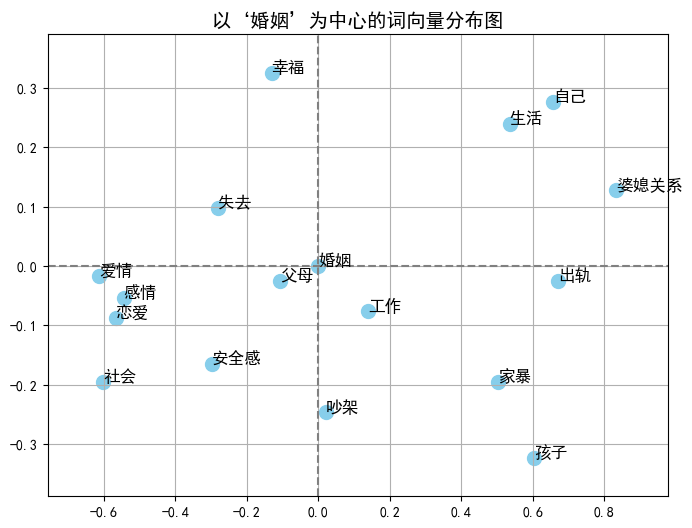

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 关键词
words = [
    '婚姻', '自己', '孩子', '生活', '爱情', '父母', 
    '家暴', '恋爱', '幸福', '社会', '感情', '出轨', 
    '工作', '吵架','安全感', '失去', '婆媳关系'
]

# 获取词向量
vectors = np.array([model.wv[word] for word in words])

# 中心化
center_word = '婚姻'
center_vector = model.wv[center_word]
centered_vectors = vectors - center_vector

# PCA降维
pca = PCA(n_components=2, svd_solver='full', random_state=42)  #固定PCA随机种子
reduced_vectors = pca.fit_transform(centered_vectors)

# 修正：把“婚姻”的点设为 (0,0)，防止数值误差显示偏移
# 找到“婚姻”在 words 中的位置
center_index = words.index(center_word)
reduced_vectors[center_index] = np.array([0.0, 0.0])  # 强制设定

# 可视化
plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], s=100, color='skyblue')

# 添加标注
for i, word in enumerate(words):
    plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=12)

# 添加参考线
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# 设置坐标范围
x_min, x_max = reduced_vectors[:, 0].min(), reduced_vectors[:, 0].max()
y_min, y_max = reduced_vectors[:, 1].min(), reduced_vectors[:, 1].max()
padding_x = (x_max - x_min) * 0.1
padding_y = (y_max - y_min) * 0.1
plt.xlim(x_min - padding_x, x_max + padding_x)
plt.ylim(y_min - padding_y, y_max + padding_y)

# 标题与网格线
plt.title("以‘婚姻’为中心的词向量分布图", fontsize=14)
plt.grid(True)

plt.savefig("D:/text analysis/婚姻为中心_词向量图.png", dpi=300, bbox_inches='tight')
plt.show()

# 损失计算

In [19]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

# 初始化模型（注意：不要设置 epochs，这里手动控制）
model = Word2Vec(
    vector_size=100,
    window=5,
    min_count=1,
    sg=1,
    compute_loss=True
)

# 构建词汇表
model.build_vocab(corpus)

# 手动逐轮训练并记录损失
losses = []
previous_loss = 0
epochs = 10

for epoch in range(epochs):
    model.train(
        corpus,
        total_examples=model.corpus_count,
        epochs=1,
        compute_loss=True
    )
    current_loss = model.get_latest_training_loss()
    epoch_loss = current_loss - previous_loss
    losses.append(epoch_loss)
    previous_loss = current_loss

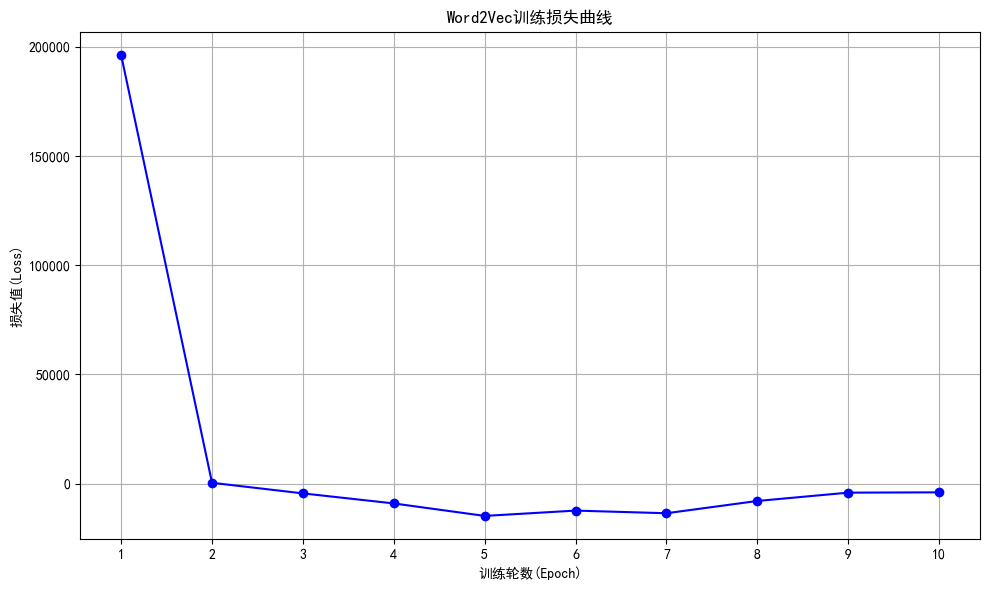


最终模型信息：
词汇表大小：5668


In [20]:
## 绘制损失曲线
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), losses, 'o-', color='blue')
plt.title('Word2Vec训练损失曲线')
plt.xlabel('训练轮数(Epoch)')
plt.ylabel('损失值(Loss)')
plt.grid(True)
plt.xticks(range(1, epochs + 1))
plt.tight_layout()
plt.show()

## 打印最终模型的一些信息
print("\n最终模型信息：")
print(f"词汇表大小：{len(model.wv.key_to_index)}")